# Introduction to Matplotlib: Figures and Subplots

## What is Matplotlib?

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Developed as a visualization tool comparable to MATLAB, it has become the standard plotting library in the Python ecosystem for producing publication-quality figures across platforms and fields.

### Key Features:

- **Publication-quality output**: Generate high-quality plots for papers, presentations, and web applications
- **Fully customizable**: Control every aspect of your visualization
- **Cross-platform**: Works consistently across operating systems
- **Interactive and non-interactive modes**: Use in scripts or interactive environments
- **Integration with diverse GUI toolkits**: Embed plots in various applications
- **Extensive file format support**: Export to PNG, PDF, SVG, EPS, and more

This tutorial introduces the fundamental concepts in Matplotlib with a focus on understanding its architecture, creating figures, and working with subplots.

## Documentation and Resources

### Official Documentation
The [matplotlib.org](http://matplotlib.org) website offers comprehensive documentation including:

- [**Plot Gallery**](https://matplotlib.org/stable/gallery/index): Examples of different plot types with code
- [**Plot Types**](https://matplotlib.org/stable/plot_types/index.html): Catalog of visualization types
- [**API Reference**](https://matplotlib.org/stable/api/index.html): Detailed function and class documentation
- [**Tutorials**](https://matplotlib.org/stable/tutorials/index.html): Step-by-step guides for various tasks
- [**Cheatsheets**](https://matplotlib.org/cheatsheets/): Quick reference guides

### Learning Strategy

The most effective way to learn Matplotlib is to:

1. **Browse the gallery** to find examples similar to what you want to create
2. **Modify existing examples** to match your requirements
3. **Consult the API documentation** when you need specific details

### Community Resources

- **GitHub**: [matplotlib/matplotlib](https://github.com/matplotlib/matplotlib)
- **StackOverflow**: Tag [matplotlib](https://stackoverflow.com/questions/tagged/matplotlib)
- **Discourse Forum**: [discourse.matplotlib.org](https://discourse.matplotlib.org/)


# Understanding Matplotlib's Architecture

Matplotlib's architecture is designed to be hierarchical, offering flexibility for both beginners and advanced users. This design allows for quick and simple plotting with sensible defaults, while also enabling detailed customization for complex visualizations.

## The Layered Architecture of Matplotlib

Matplotlib operates at three main levels, each serving a distinct purpose:

1. **Backend Layer**:  
   The backend layer is responsible for rendering the visualizations. It handles the actual drawing to various outputs, such as interactive windows, image files (e.g., PNG, SVG), or vector graphics. Backends can be categorized into:
   - **Interactive Backends**: For displaying plots in real-time (e.g., `TkAgg`, `Qt5Agg`, `ipympl`).
   - **Non-Interactive Backends**: For generating static files (e.g., `Agg`, `PDF`, `SVG`).

2. **Artist Layer**:  
   The artist layer contains objects that represent all elements of a plot, such as lines, text, markers, and axes. These objects are called "artists" and are responsible for the visual representation of data. Examples include:
   - `Line2D` for lines
   - `Text` for labels and titles
   - `Patch` for shapes like rectangles and circles

3. **Scripting Layer**:  
   The scripting layer provides a high-level interface through the `pyplot` module, which mimics MATLAB's plotting style. This layer simplifies the creation of plots by managing figures and axes automatically.

## Plotting Interfaces in Matplotlib

Matplotlib offers two primary interfaces for creating visualizations, catering to different levels of expertise and use cases:

### 1. Object-Oriented API  
The object-oriented approach involves explicitly creating and managing `Figure` and `Axes` objects. This method provides fine-grained control over every aspect of the plot, making it ideal for:
- Complex visualizations
- Multi-plot layouts
- Production-quality code

### 2. Pyplot Interface
The pyplot interface (often imported as `plt`) provides a MATLAB-like, state-based interface that automatically manages figures and axes. This approach is:
- More concise for simple plots
- Familiar to MATLAB users
- Excellent for quick data exploration

The two interfaces operate on the same underlying objects but offer different levels of abstraction. The pyplot interface is built on top of the object-oriented API and ultimately creates and manages the same artist objects.

### Choosing Between Interfaces

While both interfaces can produce identical results, they each have their strengths:

- **Use pyplot** when creating simple, exploratory plots or when working in interactive sessions
- **Use the object-oriented API** when building complex visualizations, embedding plots in GUI applications, or working with multiple subplots

As you progress in your Matplotlib journey, you'll likely move from primarily using pyplot to increasingly using the object-oriented API for more advanced applications.



# Understanding Matplotlib Backends

## What is a Backend?

A backend is the component of Matplotlib that actually does the drawing to produce output. Different backends support different output formats and use cases.

### Two Types of Backends:

1. **Interactive Backends**: Display plots on screen and respond to user interaction (e.g., zooming, panning)
2. **Non-Interactive Backends**: Generate static output files (PNG, PDF, SVG, etc.)

### Common Interactive Backends:
- **TkAgg**: Uses Tk as the GUI framework with Agg rendering
- **Qt5Agg**: Uses Qt5 with Agg rendering
- **ipympl**: Jupyter-optimized backend (works well in notebooks)
- **nbAgg**: Classic Jupyter notebook backend

### Common Non-Interactive Backends:
- **Agg**: High-quality raster graphics (PNG)
- **PDF**: Vector output in PDF format
- **SVG**: Scalable Vector Graphics format
- **PS/EPS**: PostScript output

Let's see what backends are available in our environment:

In [18]:
import matplotlib

# Retrieve the list of all built-in plotting backends.
print("All available backends:")
all_backends = matplotlib.backends.backend_registry.list_builtin()
print(all_backends)

All available backends:
['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


## Getting Started

In this tutorial, we'll use the following import statements. These abbreviations are semi-standardized, and most tutorials, other scientific python code that you'll find elsewhere will use them as well.

In [19]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Figures
=================

![](images/anatomy.png)



`matplotlib.figure.Figure`
----------------------------------

The **Figure** is the top-level container in Matplotlib's hierarchy that represents the entire visualization space. The figure keeps track of all the child elements, including:

- One or more `matplotlib.axes.Axes` objects (the actual plotting areas)
- Special artists like titles, figure legends, and colorbars
- The **canvas** (the backend-specific drawing surface where rendering occurs)

A Figure serves as the foundation for all plotting activities and can contain multiple subplots arranged in various layouts. While you typically interact with Axes objects for most plotting operations, the Figure provides essential methods for:

- Managing figure size, DPI, and background properties
- Saving visualizations to various file formats
- Adding new Axes objects with specific positioning
- Controlling layout and spacing between subplots

Create figures using `plt.figure()` or `plt.subplots()`, with the latter automatically creating both Figure and Axes objects for convenience.


Now let's create a figure

In [20]:
import matplotlib.pyplot as plt 

fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Awww, nothing happened! This is because by default mpl will not show anything until told to do so, as we mentioned earlier in the "backend" discussion.

Instead, we'll need to call ``plt.show()``

In [21]:
plt.show()

In this case we don't see anything because the figure does not have axes yet. When using Jupyter notebooks, the command ``plt.show()`` is not mandatory since the system will try to automatically display the output of a cell. Different story if the code is iembedded in a Python script run in the terminal for example. 

However, while we're on the topic, you can control the size of the figure through the ``figsize`` argument, which expects a tuple of ``(width, height)`` in inches. 

In [22]:
fig = plt.figure(figsize=(9, 3), dpi=100)

<Figure size 900x300 with 0 Axes>

A really useful utility function is [`figaspect`](http://matplotlib.org/api/figure_api.html?highlight=figaspect#matplotlib.figure.figaspect)

In [23]:
# Twice as tall as it is wide:
fig = plt.figure(figsize=plt.figaspect(2.0))

<Figure size 400x800 with 0 Axes>

# Axes

All plotting is done with respect to an [`Axes`](https://matplotlib.org/stable/api/axes_api.html). An *Axes* is made up of [`Axis`](https://matplotlib.org/stable/api/axis_api.html) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

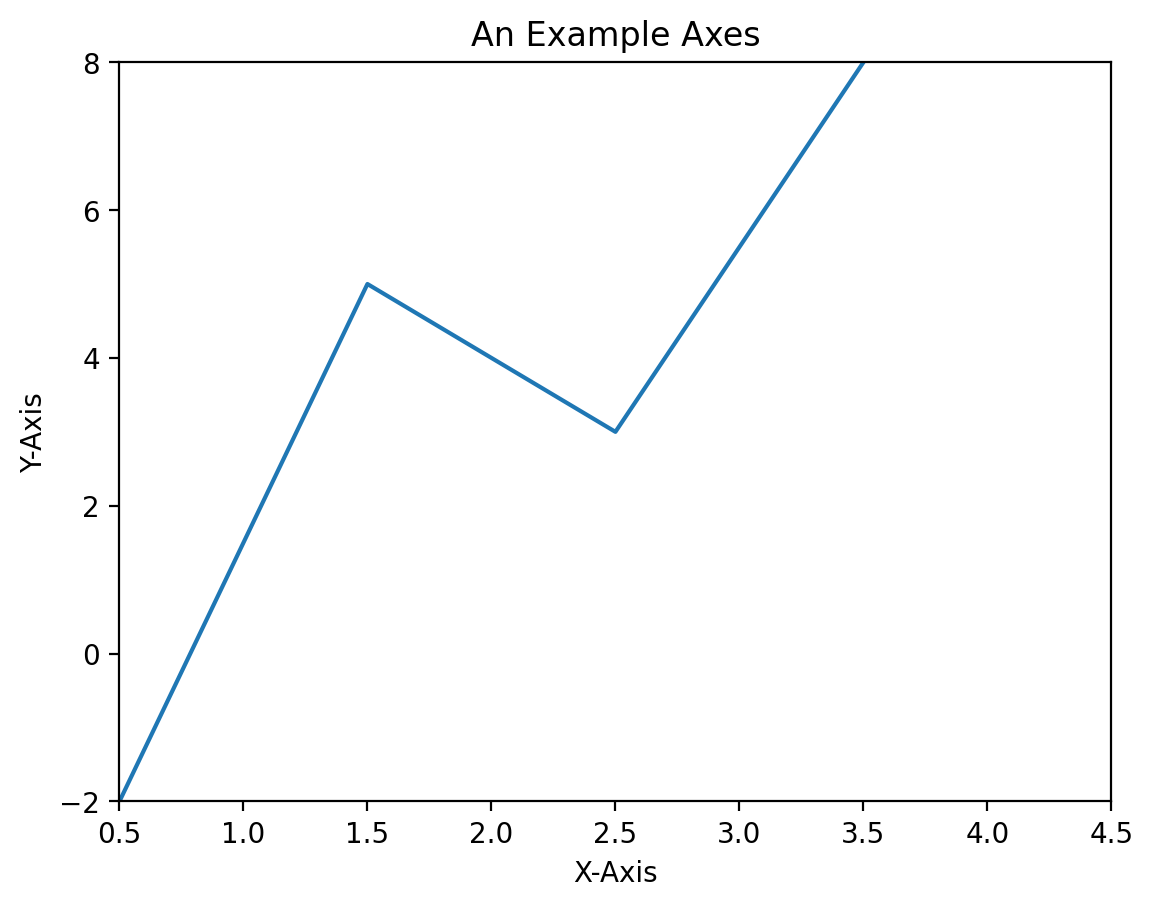

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
        ylabel='Y-Axis', xlabel='X-Axis')
ax.plot([0.5, 1.5, 2.5, 3.5], [-2,5,3,8])


Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

In [25]:
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('An Example Axes')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')

Text(0.5, 48.0, 'X-Axis')

Clearly this can get repetitive quickly.  Therefore, Matplotlib's `set` method can be very handy.  It takes each kwarg you pass it and tries to call the corresponding "setter".  For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

## Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

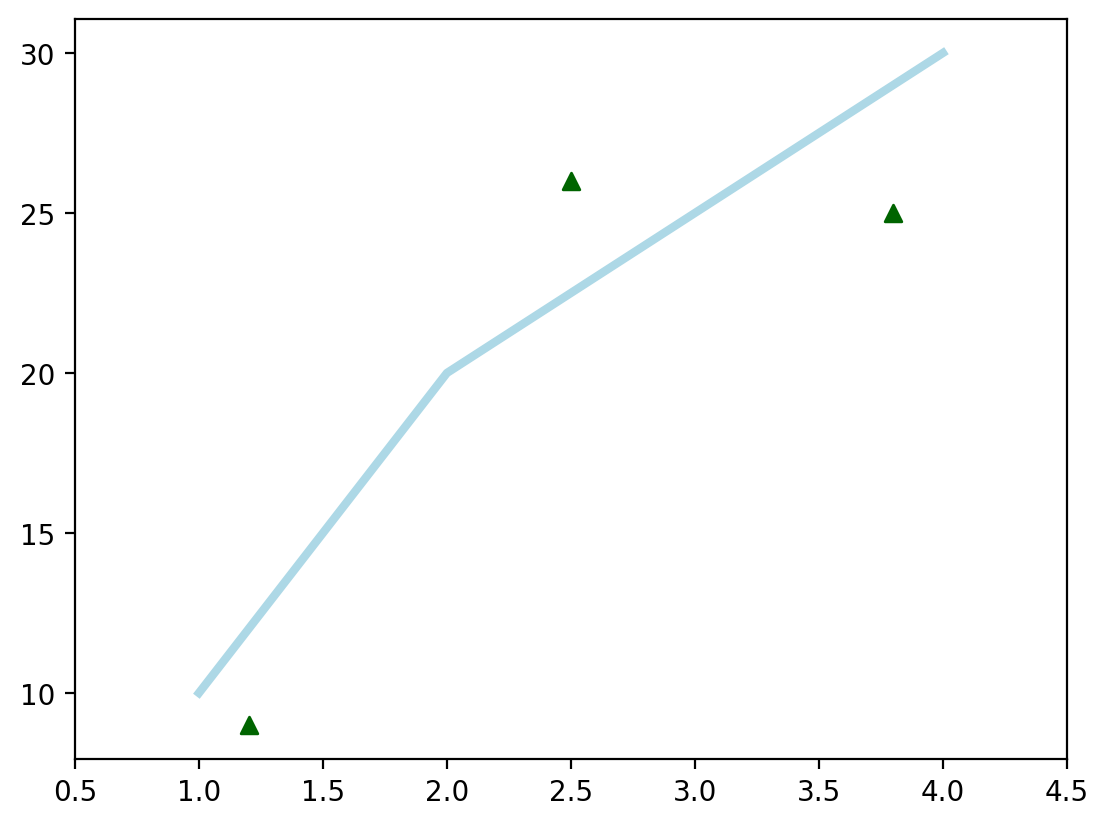

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

A note on the Object-Oriented API vs Pyplot
===========================================

Matplotlib has two interfaces. The first is an object-oriented (OO)
interface. In this case, we utilize an instance of `axes.Axes`
in order to render visualizations on an instance of `figure.Figure`.

The second is based on MATLAB and uses
a state-based interface. This is encapsulated in the `pyplot`
module. 

Most of the terms are straightforward but the main thing to remember
is that:

* The Figure is the final image that may contain 1 or more Axes.
* The Axes represent an individual plot (don't confuse this with the word
  "axis", which refers to the x/y axis of a plot).

We call methods that do the plotting directly from the Axes, which gives
us much more flexibility and power in customizing our plot. 

<div class="alert alert-info"><h4>Note</h4><p>In general, try to use the object-oriented interface over the pyplot
   interface.</p></div>

## Axes methods vs. pyplot

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

(0.5, 4.5)

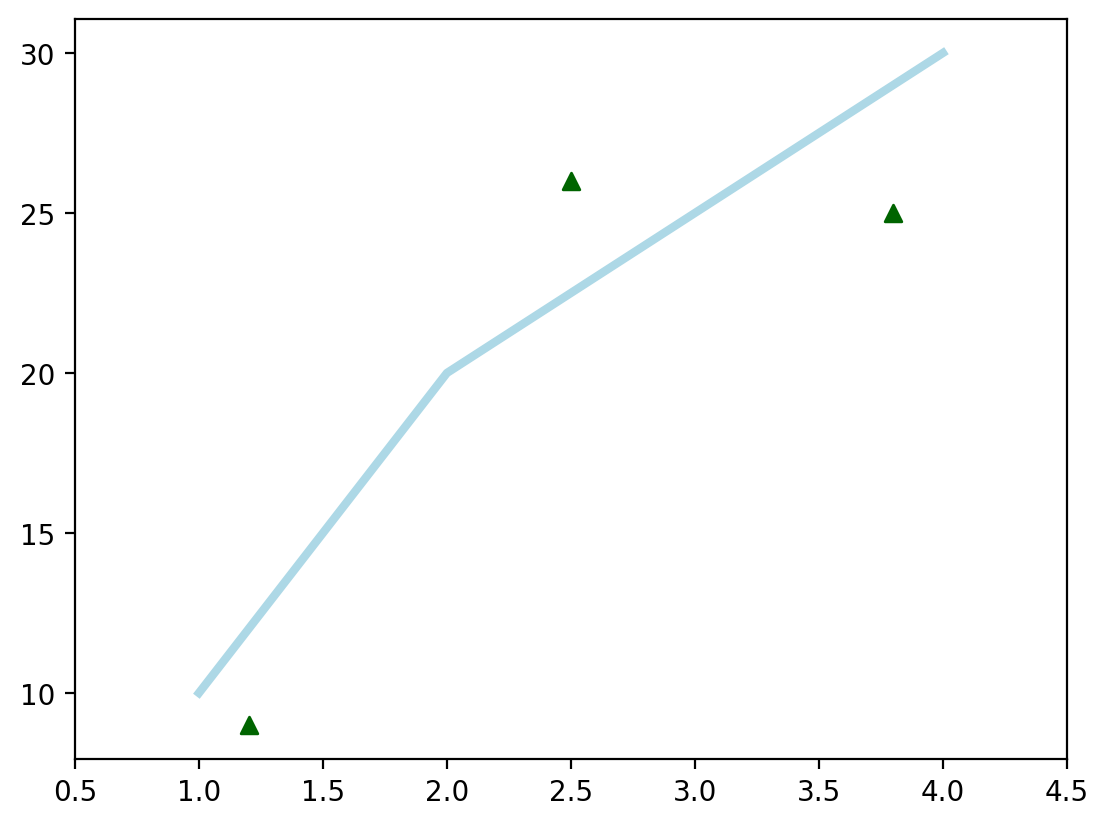

In [35]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)


Much cleaner! So, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easier to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

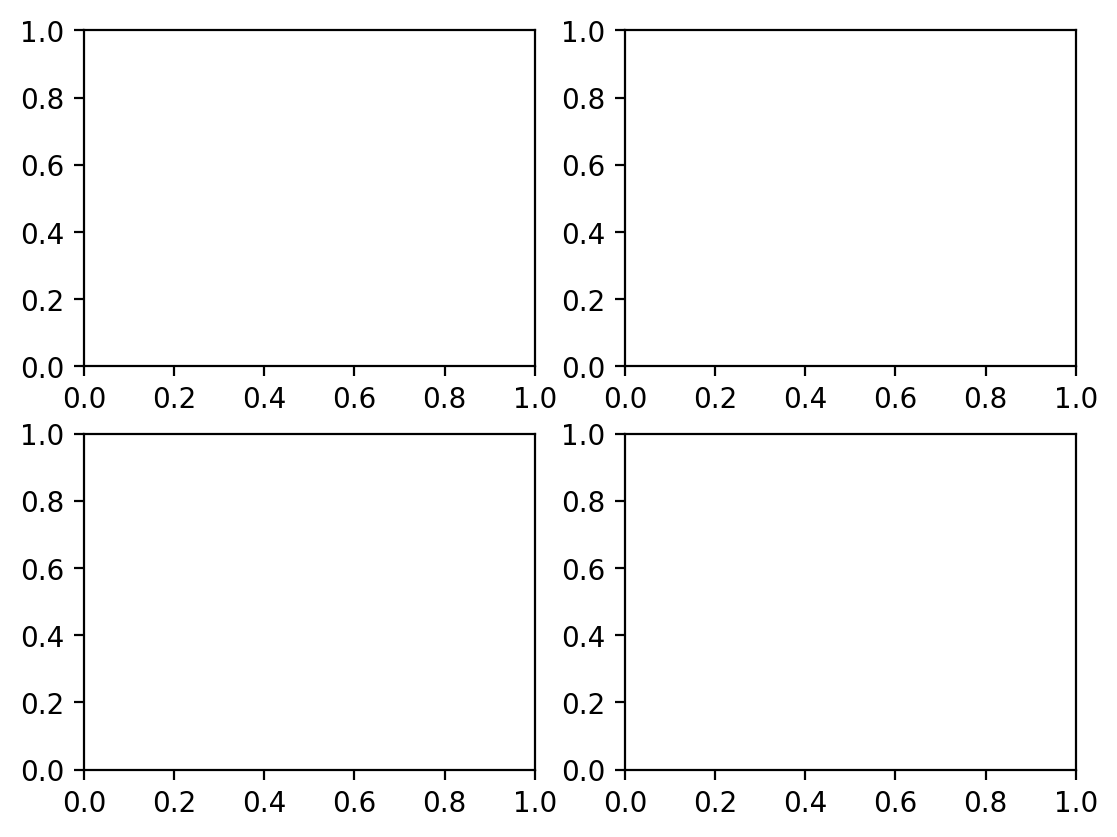

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2)

In [29]:
print(axes)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

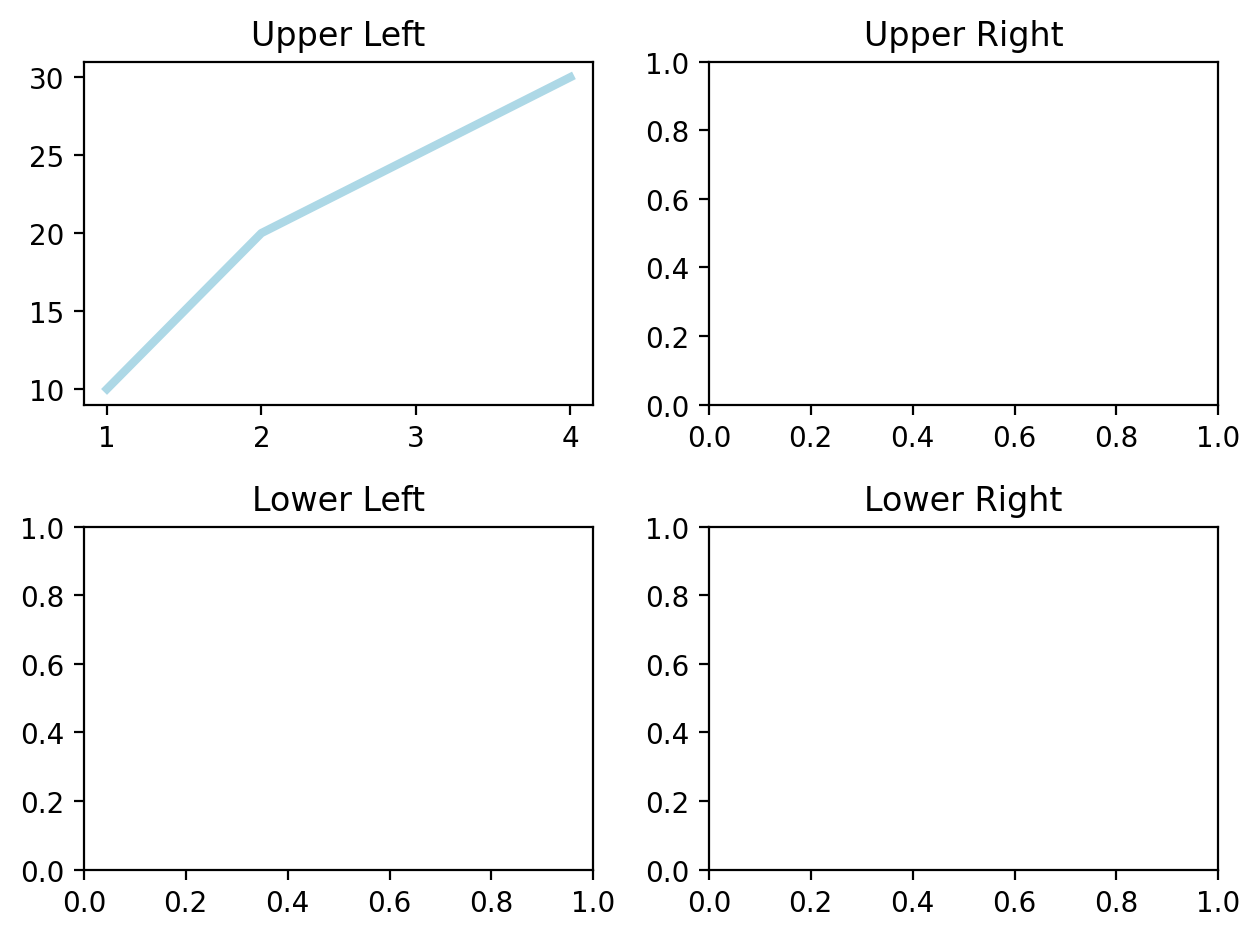

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

axes[0,0].plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)

fig.tight_layout()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

Simple example of multiple plots where each Axes shows a different plot:

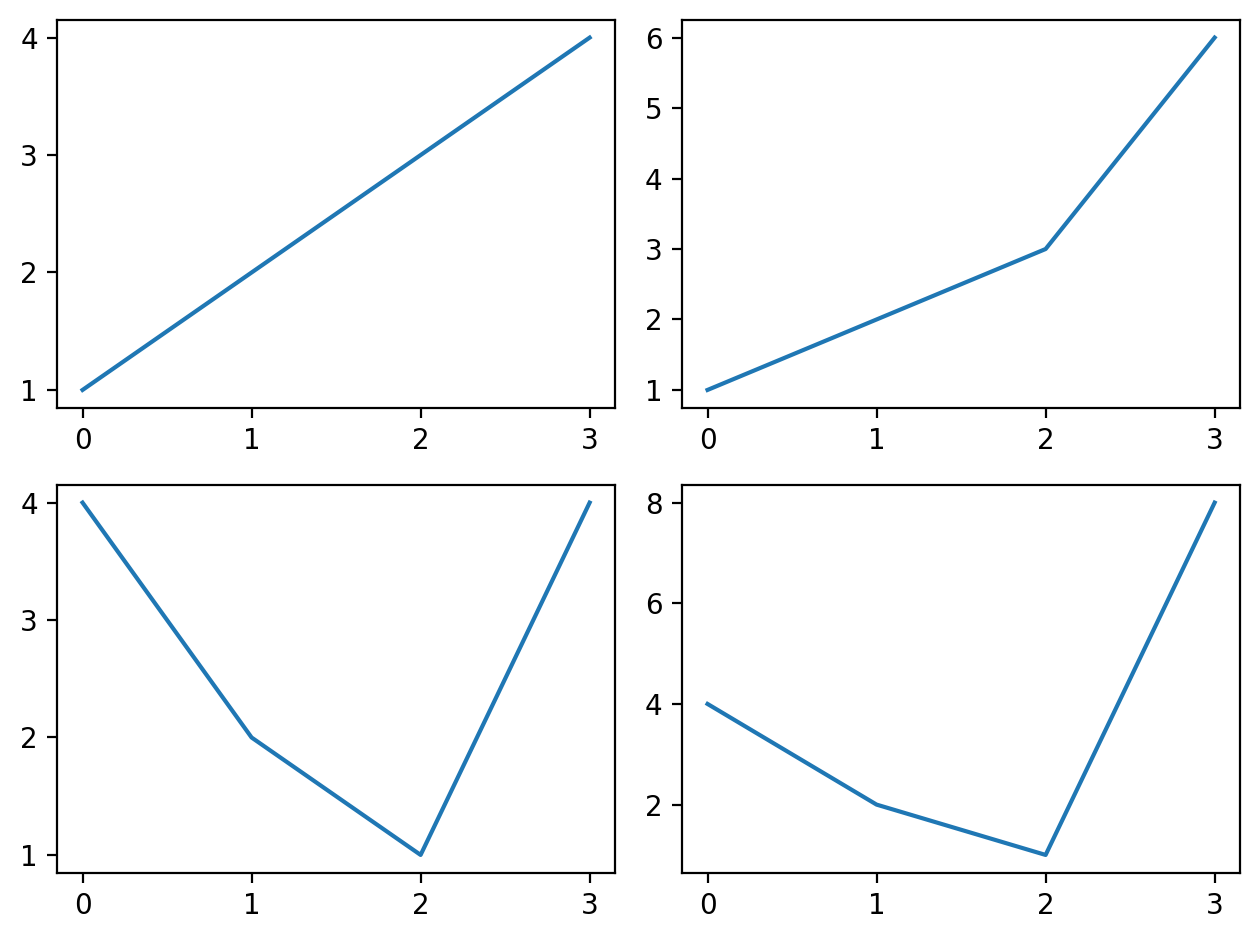

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].plot([1,2,3,4])
axes[1,0].plot([4,2,1,4])
axes[0,1].plot([1,2,3,6])
axes[1,1].plot([4,2,1,8])

fig.tight_layout()


Saving our plot
===============

Now that we're happy with the outcome of our plot, we want to save it to
disk. There are many file formats we can save to in Matplotlib. To see
a list of available options, use:



In [32]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


We can then use the `figure.Figure.savefig` in order to save the figure
to disk. Note that there are several useful flags we'll show below:

* ``transparent=True`` makes the background of the saved figure transparent
  if the format supports it.
* ``dpi=80`` controls the resolution (dots per square inch) of the output.
* ``bbox_inches="tight"`` fits the bounds of the figure to our plot.



In [33]:
# Uncomment this line to save the figure.
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")